In [1]:
# Early WIP

In [86]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, 
    WheelZoomTool, BoxSelectTool
)

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main colour
# SC = 'red'  # Secondary colour
SC = '#ededed'

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
})


Loading BokehJS ...

In [87]:
df = pd.read_csv(ZipFile('data/mental-health-in-tech-survey.zip').open('survey.csv'),
                parse_dates=['Timestamp'])
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null datetime64[ns]
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-

In [89]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [90]:
df.describe()

,Age
count,"1,259.00"
mean,"79,428,148.31"
std,"2,818,299,442.98"
min,"-1,726.00"
25%,27.00
50%,31.00
75%,36.00
max,"99,999,999,999.00"


In [91]:
# Describe for categorical data
df.describe(include=['object']).T

,count,unique,top,freq
Gender,1259,49,Male,615
Country,1259,48,United States,751
state,744,45,CA,138
self_employed,1241,2,No,1095
family_history,1259,2,No,767
treatment,1259,2,Yes,637
work_interfere,995,4,Sometimes,465
no_employees,1259,6,6-25,290
remote_work,1259,2,No,883
tech_company,1259,2,Yes,1031


In [92]:
# Checking for top frequnet values
top_range = 5
for col in df.columns:
    if df[col].dtype == 'object' and col != 'comments':
        print(col)
        print(df[col].value_counts()[:top_range])
        print()

Gender
Male      615
male      206
Female    121
M         116
female     62
Name: Gender, dtype: int64

Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Name: Country, dtype: int64

state
CA    138
WA     70
NY     57
TN     45
TX     44
Name: state, dtype: int64

self_employed
No     1095
Yes     146
Name: self_employed, dtype: int64

family_history
No     767
Yes    492
Name: family_history, dtype: int64

treatment
Yes    637
No     622
Name: treatment, dtype: int64

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
Name: no_employees, dtype: int64

remote_work
No     883
Yes    376
Name: remote_work, dtype: int64

tech_company
Yes    1031
No      228
Name: tech_company, dtype: int64

benefits
Yes           477
Don't know    4

In [93]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [96]:
new_columns = []
for col in df.columns:
    new_col = col.replace('_', ' ')

    new_col = new_col.title()

    new_col = new_col.replace(' ', '')

    new_columns.append(new_col)
df.columns = new_columns
df.head(1)

,Timestamp,Age,Gender,Country,State,SelfEmployed,FamilyHistory,Treatment,WorkInterfere,NoEmployees,RemoteWork,TechCompany,Benefits,CareOptions,WellnessProgram,SeekHelp,Anonymity,Leave,MentalHealthConsequence,PhysHealthConsequence,Coworkers,Supervisor,MentalHealthInterview,PhysHealthInterview,MentalVsPhysical,ObsConsequence,Comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [98]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [122]:
def gender_clean(x):
    if x in ['Female', 'female', 'Cis Female','f', 'F', 'Femake', 'woman',
            'Female ', 'cis-female/femme', 'Female (cis)', 'Woman',
            'femail']:
        return 'Female'
    elif x in ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'something kinda male?',
              'Guy (-ish) ^_^', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man',
              'Mal', 'Male (CIS)', 'Cis Male', 'Make', 'Male', 'Man', 'Male ']:
        return 'Male'
    else:
        return 'Other'

# Sanity check
df['NewGender'] = df.Gender.apply(gender_clean)
df[df.NewGender == 'Other'][['Gender', 'NewGender']]

,Gender,NewGender
72,Trans-female,Other
306,queer/she/they,Other
349,non-binary,Other
387,Nah,Other
390,All,Other
413,Enby,Other
416,fluid,Other
451,Genderqueer,Other
544,Androgyne,Other
553,Agender,Other


In [124]:
df.Gender = df.NewGender
df.drop('NewGender', axis=1, inplace=True)
df.head(1)

,Timestamp,Age,Gender,Country,State,SelfEmployed,FamilyHistory,Treatment,WorkInterfere,NoEmployees,RemoteWork,TechCompany,Benefits,CareOptions,WellnessProgram,SeekHelp,Anonymity,Leave,MentalHealthConsequence,PhysHealthConsequence,Coworkers,Supervisor,MentalHealthInterview,PhysHealthInterview,MentalVsPhysical,ObsConsequence,Comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [118]:
df.iloc[1058]['Gender']

'Male '

ValueError: num must be 1 <= num <= 24, not 25

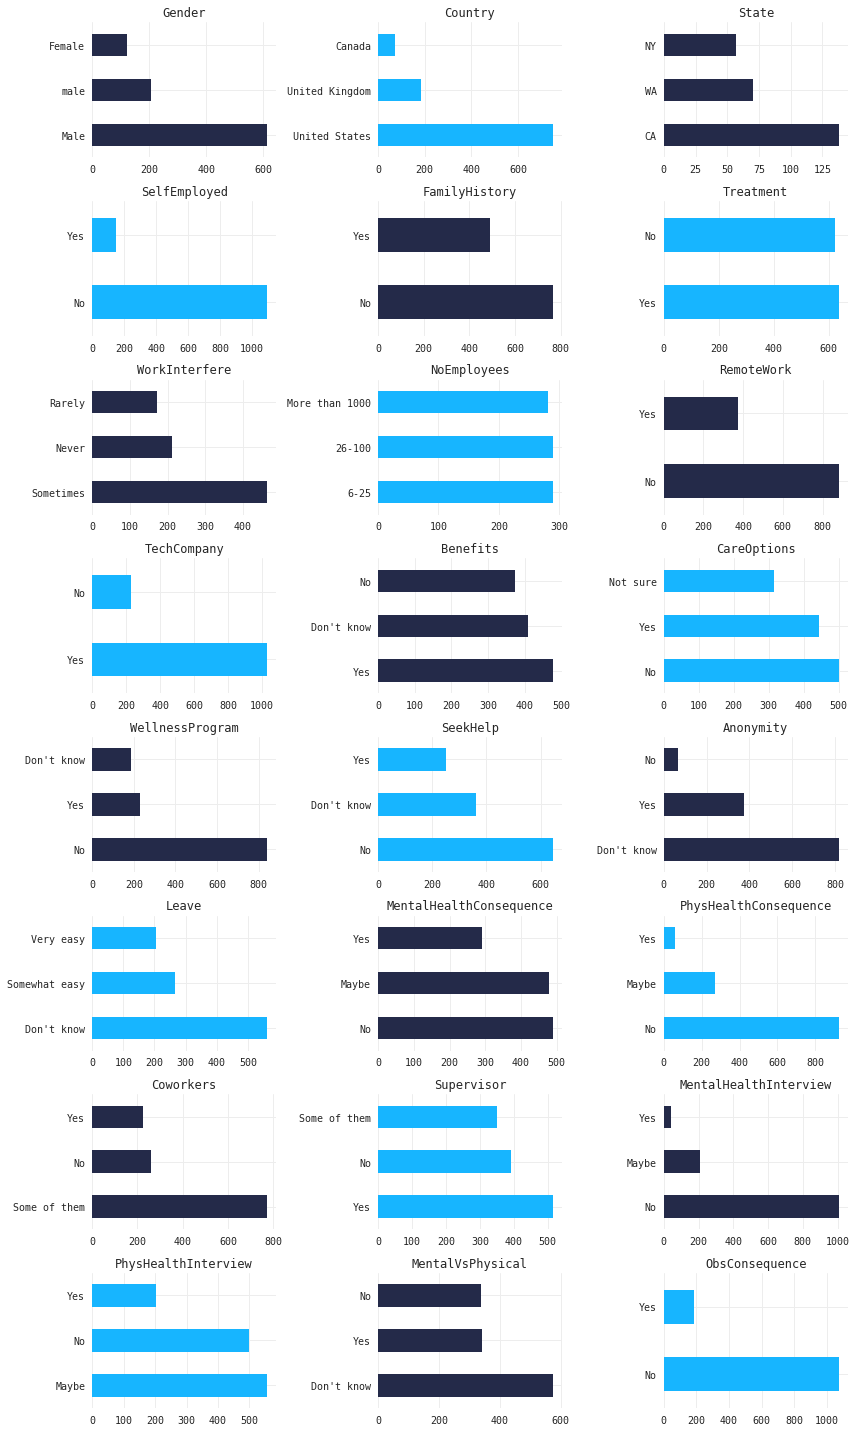

In [107]:
# Checking for top frequnet values
top_range = 3
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'comments']
plt.figure(figsize=(12, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col, fontsize=12)
    df[col].value_counts()[:top_range].plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]]);
    plt.tight_layout()